In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns       

In [34]:
df= pd.read_csv('taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [35]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [36]:
#when having many columns , we can use tranformer , pipelines 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [37]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [38]:
num_features = ['Trip_Distance_km','Passenger_Count', 'Base_Fare','Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

cat_features =['Time_of_Day', 'Day_of_Week','Traffic_Conditions', 'Weather']

In [39]:
num_trans= SimpleImputer(strategy='mean')

col_trans= Pipeline(steps=[
    ('imp',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])


In [40]:
preprocessor = ColumnTransformer([
    
    ('num',num_trans,num_features),
    ('cat',col_trans,cat_features)
])

In [41]:
data= preprocessor.fit_transform(df)
#here data is in array form not dataframe 

In [42]:
ohe =preprocessor.named_transformers_['cat'].named_steps['encode']
ohe_cols = ohe.get_feature_names_out(cat_features)

all_cols =num_features+list(ohe_cols)

dt =pd.DataFrame(data,columns=all_cols)
dt.head()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.560000,0.80,0.32,53.82,36.262400,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,47.590000,1.0,3.502989,0.62,0.43,40.57,56.874773,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,36.870000,1.0,2.700000,1.21,0.15,37.27,52.903200,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30.330000,4.0,3.480000,0.51,0.15,116.81,36.469800,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,27.070547,3.0,2.930000,0.63,0.32,22.64,15.618000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [43]:
dt.isnull().sum()

Trip_Distance_km             0
Passenger_Count              0
Base_Fare                    0
Per_Km_Rate                  0
Per_Minute_Rate              0
Trip_Duration_Minutes        0
Trip_Price                   0
Time_of_Day_Afternoon        0
Time_of_Day_Evening          0
Time_of_Day_Morning          0
Time_of_Day_Night            0
Day_of_Week_Weekday          0
Day_of_Week_Weekend          0
Traffic_Conditions_High      0
Traffic_Conditions_Low       0
Traffic_Conditions_Medium    0
Weather_Clear                0
Weather_Rain                 0
Weather_Snow                 0
dtype: int64

In [44]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Passenger_Count            1000 non-null   float64
 2   Base_Fare                  1000 non-null   float64
 3   Per_Km_Rate                1000 non-null   float64
 4   Per_Minute_Rate            1000 non-null   float64
 5   Trip_Duration_Minutes      1000 non-null   float64
 6   Trip_Price                 1000 non-null   float64
 7   Time_of_Day_Afternoon      1000 non-null   float64
 8   Time_of_Day_Evening        1000 non-null   float64
 9   Time_of_Day_Morning        1000 non-null   float64
 10  Time_of_Day_Night          1000 non-null   float64
 11  Day_of_Week_Weekday        1000 non-null   float64
 12  Day_of_Week_Weekend        1000 non-null   float64
 13  Traffic_Conditions_High    1000 non-null   float6

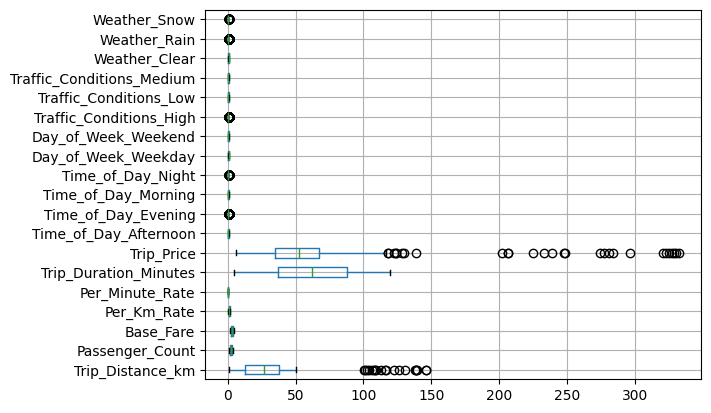

In [45]:
dt.select_dtypes(include='number').boxplot(vert=False)
plt.show()

In [46]:
import numpy as np
from scipy import stats

dt= dt[(np.abs(stats.zscore(dt)) < 3).all(axis=1)]


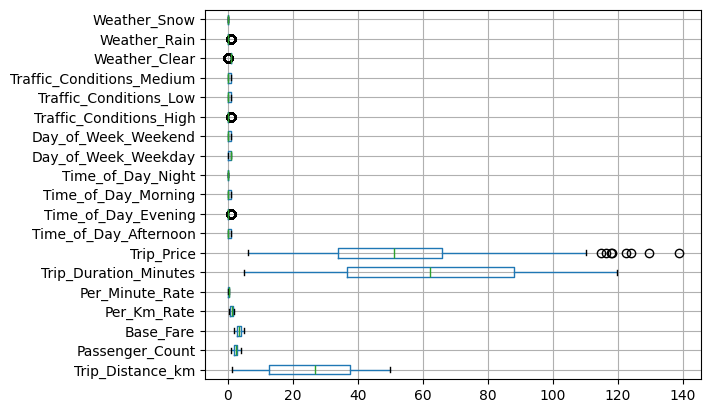

In [47]:
dt.select_dtypes(include='number').boxplot(vert=False)
plt.show()

In [48]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           839 non-null    float64
 1   Passenger_Count            839 non-null    float64
 2   Base_Fare                  839 non-null    float64
 3   Per_Km_Rate                839 non-null    float64
 4   Per_Minute_Rate            839 non-null    float64
 5   Trip_Duration_Minutes      839 non-null    float64
 6   Trip_Price                 839 non-null    float64
 7   Time_of_Day_Afternoon      839 non-null    float64
 8   Time_of_Day_Evening        839 non-null    float64
 9   Time_of_Day_Morning        839 non-null    float64
 10  Time_of_Day_Night          839 non-null    float64
 11  Day_of_Week_Weekday        839 non-null    float64
 12  Day_of_Week_Weekend        839 non-null    float64
 13  Traffic_Conditions_High    839 non-null    float64
 14 

In [49]:
from scipy.stats.mstats import winsorize

dt['Weather_Clear'] = winsorize(dt['Weather_Clear'],limits=[0.05,0.05])
dt['Weather_Rain'] = winsorize(dt['Weather_Rain'],limits=[0.05,0.05])
dt['Time_of_Day_Evening'] = winsorize(dt['Time_of_Day_Evening'],limits=[0.05,0.05])
dt['Traffic_Conditions_High'] = winsorize(dt['Traffic_Conditions_High'],limits=[0.05,0.05])
dt['Trip_Price'] = winsorize(dt['Trip_Price'],limits=[0.05,0.05])


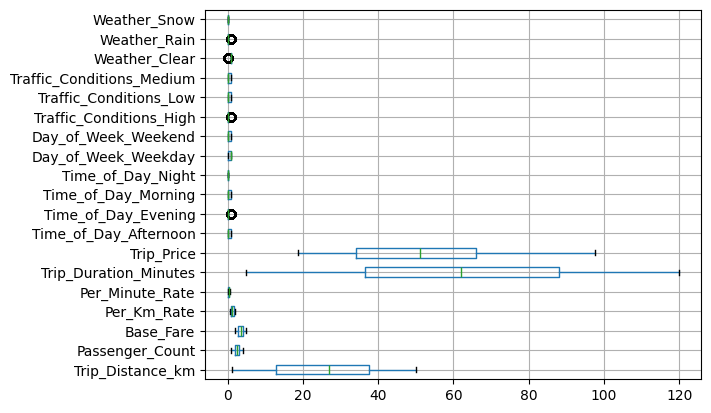

In [50]:
dt.select_dtypes(include='number').boxplot(vert=False)
plt.show()

In [51]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           839 non-null    float64
 1   Passenger_Count            839 non-null    float64
 2   Base_Fare                  839 non-null    float64
 3   Per_Km_Rate                839 non-null    float64
 4   Per_Minute_Rate            839 non-null    float64
 5   Trip_Duration_Minutes      839 non-null    float64
 6   Trip_Price                 839 non-null    float64
 7   Time_of_Day_Afternoon      839 non-null    float64
 8   Time_of_Day_Evening        839 non-null    float64
 9   Time_of_Day_Morning        839 non-null    float64
 10  Time_of_Day_Night          839 non-null    float64
 11  Day_of_Week_Weekday        839 non-null    float64
 12  Day_of_Week_Weekend        839 non-null    float64
 13  Traffic_Conditions_High    839 non-null    float64
 14 

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [53]:
y=dt['Trip_Price']
x=dt.drop('Trip_Price',axis=1)


In [54]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
lr=LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [56]:
y_predict=lr.predict(X_test)

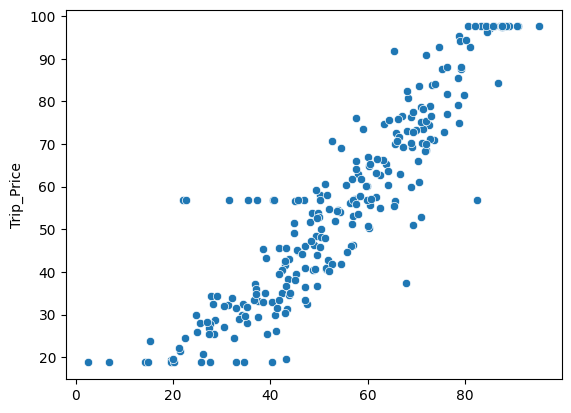

In [57]:
sns.scatterplot(x=y_predict,y=y_test)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


mae =mean_absolute_error(y_predict,y_test)
mse = mean_squared_error(y_predict,y_test)
rmse= np.sqrt(mse)
r2 =r2_score(y_predict,y_test)

print("mae",mae)
print("mse",mse)
print("rsme",rmse)
print("r2",r2)

#r2 explains the variation in the target ur model is able to predict 

mae 7.293164986349459
mse 91.6014416032578
rsme 9.570864203574189
r2 0.742866217275884


In [59]:
from sklearn.preprocessing import PolynomialFeatures

ploy =PolynomialFeatures(degree=2,include_bias=False)
x_poly= ploy.fit_transform(X_train)
x_test_poly =ploy.fit_transform(X_test)

In [60]:
lr2=LinearRegression()
lr2.fit(x_poly,y_train)

LinearRegression()

In [61]:
ypredict2=lr2.predict(x_test_poly)

In [62]:

mae =mean_absolute_error(ypredict2,y_test)
mse = mean_squared_error(ypredict2,y_test)
rmse= np.sqrt(mse)
r2 =r2_score(ypredict2,y_test)

print("mae",mae)
print("mse",mse)
print("rsme",rmse)
print("r2",r2)

mae 5.033224254202391
mse 61.669105298631834
rsme 7.852967929301115
r2 0.8614067705106851


In [69]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.2)
model.fit(X_train,y_train)

predicted =model.predict(X_test)

In [70]:
mae =mean_absolute_error(predicted,y_test)
mse = mean_squared_error(predicted,y_test)
rmse= np.sqrt(mse)
r2 =r2_score(predicted,y_test)

print("mae",mae)
print("mse",mse)
print("rsme",rmse)
print("r2",r2)

mae 7.6031764781925
mse 95.6715306983032
rsme 9.781182479552418
r2 0.7176146231201357


In [73]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=100).fit(x, y)

print("Best alpha:", lasso_cv.alpha_)


Best alpha: 0.2408900888798496
